# Bollinger Bands

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [2]:
ticker="MSFT"
start_date="2025-01-01"
end_date="2025-05-20"

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date,multi_level_index=False)
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
display(data.tail())

,Close,High,Low,Open,Volume,BB_High,BB_Low,BB_Middle
Date,,,,,,,,
2025-05-12,448.436737,448.546521,438.974098,445.122814,22821900,459.895186,344.881373,402.388280
2025-05-13,448.316986,449.844181,444.543884,446.959462,23618800,465.820572,345.077752,405.449162
2025-05-14,452.109985,453.068218,447.318794,447.318794,19902800,471.666075,345.940932,408.803503
2025-05-15,453.130005,456.190002,450.429993,450.769989,21992300,476.081625,349.745481,412.913553
2025-05-16,454.269989,454.359985,448.730011,452.049988,23803400,479.212328,355.331172,417.271750


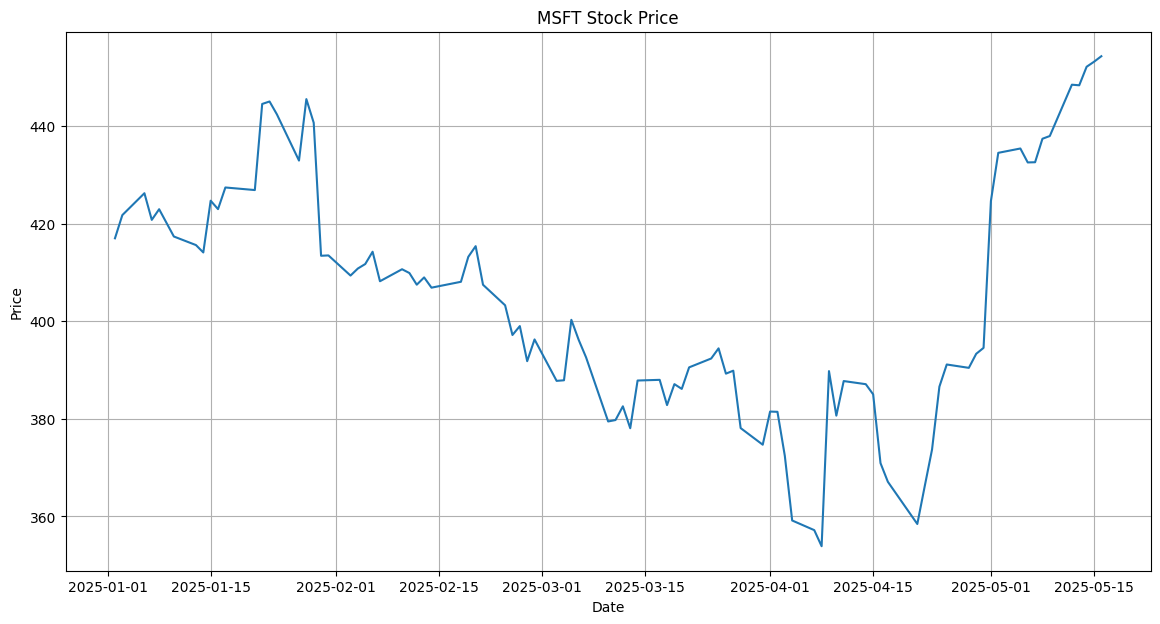

In [4]:
#plot the stock price
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

## Bollinger Bands (BB):

- ความหมาย: Bollinger Bands คือเครื่องมือที่ใช้ในการวิเคราะห์ทางเทคนิค เพื่อวัดความผันผวนของราคา และหาระดับแนวรับแนวต้าน
- ส่วนประกอบ: Bollinger Bands ประกอบด้วยเส้น 3 เส้น:
    1. Middle Band (MB): คือเส้นค่าเฉลี่ยเคลื่อนที่อย่างง่าย (Simple Moving Average - SMA) ของราคา โดยทั่วไปจะใช้ SMA 20 วัน
    2. Upper Band (UB): คือเส้นที่อยู่เหนือ Middle Band โดยคำนวณจากค่าเบี่ยงเบนมาตรฐาน (Standard Deviation - SD) ของราคา คูณด้วยค่าคงที่ (โดยทั่วไปคือ 2) แล้วบวกเข้ากับ Middle Band
    3. Lower Band (LB): คือเส้นที่อยู่ใต้ Middle Band โดยคำนวณจากค่าเบี่ยงเบนมาตรฐานของราคา คูณด้วยค่าคงที่ แล้วลบออกจาก Middle Band
- สูตรการคำนวณ:
    - MB = SMA (ราคาปิด, n)
    - UB = MB + (SD (ราคาปิด, n) x k)
    - LB = MB - (SD (ราคาปิด, n) x k)
        - โดยที่ n คือช่วงเวลา (Period) และ k คือค่าคงที่ (Standard Deviation Multiplier)
- การตีความ:
    - ความผันผวน: Bollinger Bands จะขยายกว้างขึ้นเมื่อราคาผันผวน และจะแคบลงเมื่อราคาเคลื่อนที่ Sideways หรือมีความผันผวนต่ำ
    - Overbought และ Oversold:
        - เมื่อราคาขึ้นไปใกล้ Upper Band อาจบ่งบอกถึงสภาวะ Overbought (ซื้อมากเกินไป)
        - เมื่อราคาลงมาใกล้ Lower Band อาจบ่งบอกถึงสภาวะ Oversold (ขายมากเกินไป)
    - Breakout:
        - เมื่อราคา Breakout (ทะลุ) Upper Band อาจเป็นสัญญาณว่าแนวโน้มขาขึ้นกำลังจะเริ่มต้น
        - เมื่อราคา Breakdown (หลุด) Lower Band อาจเป็นสัญญาณว่าแนวโน้มขาลงกำลังจะเริ่มต้น
    - Squeeze: เมื่อ Bollinger Bands บีบแคบลงมาก ๆ อาจเป็นสัญญาณว่ากำลังจะเกิดการเคลื่อนที่ครั้งใหญ่ของราคา
- การใช้งาน:
    - วัดความผันผวน
    - หาระดับแนวรับและแนวต้าน
    - ระบุ Overbought และ Oversold
    - หาระยะเวลาในการ Breakout
- สิ่งที่ Bollinger Bands บอกเรา:
    - ความผันผวนของราคา
    - สภาวะ Overbought และ Oversold
    - โอกาสในการ Breakout

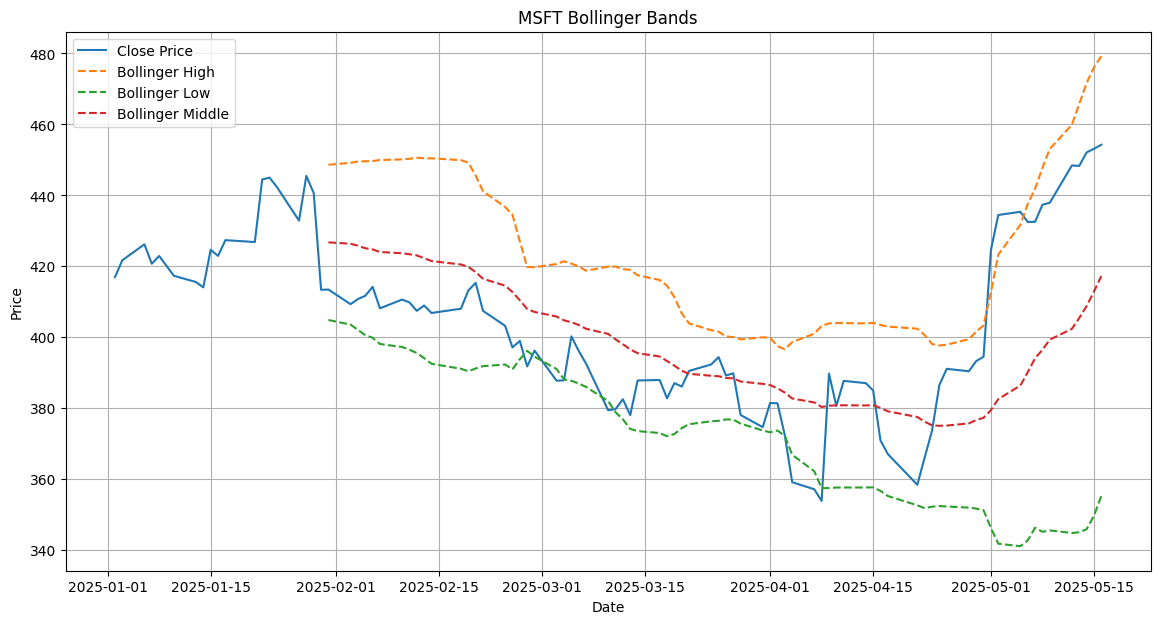

In [5]:
# Bollinger Bands
data['BB_High'] = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2).bollinger_hband()
data['BB_Low'] = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2).bollinger_lband()
data['BB_Middle'] = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2).bollinger_mavg()
#plot the Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['BB_High'], label='Bollinger High', linestyle='--')
plt.plot(data['BB_Low'], label='Bollinger Low', linestyle='--')
plt.plot(data['BB_Middle'], label='Bollinger Middle', linestyle='--')
plt.title(f'{ticker} Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()